<a href="https://colab.research.google.com/github/CamillaSemenzzatt/PROJETO-APLICADO-III/blob/main/Genero_municipio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -O 'tabela4093.xlsx' 'https://github.com/CamillaSemenzzatt/PROJETO-APLICADO-III/raw/cdfd92714e2bb52cec2e8b7cf19399e2f5bc258a/tabela4093%20(1).xlsx'

tabela = pd.read_excel('tabela4093.xlsx')

print(tabela)

--2025-03-23 15:55:24--  https://github.com/CamillaSemenzzatt/PROJETO-APLICADO-III/raw/cdfd92714e2bb52cec2e8b7cf19399e2f5bc258a/tabela4093%20(1).xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/cdfd92714e2bb52cec2e8b7cf19399e2f5bc258a/tabela4093%20(1).xlsx [following]
--2025-03-23 15:55:24--  https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/cdfd92714e2bb52cec2e8b7cf19399e2f5bc258a/tabela4093%20(1).xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51777 (51K) [application/octet-stream]
Saving to: ‘tabela4093.xlsx’

tabela4093.x

In [9]:
tabela = tabela.drop([0, 1])
tabela = tabela.reset_index(drop=True)

tabela = tabela.rename(columns={
    'Tabela 4093 - Pessoas de 14 anos ou mais de idade, total, na força de trabalho, ocupadas, desocupadas, fora da força de trabalho, em situação de informalidade e respectivas taxas e níveis, por sexo': 'municipio',
    'Unnamed: 1': 'trimestre',
    'Unnamed: 2': 'Sexo',
    'Unnamed: 3': 'quantidade'
})

ultima_palavra_valida = {coluna: None for coluna in tabela.columns}

for index, row in tabela.iterrows():
    for coluna in tabela.columns:
        if pd.isnull(row[coluna]):
            if ultima_palavra_valida[coluna] is not None:
                row[coluna] = ultima_palavra_valida[coluna]
        else:
            ultima_palavra_valida[coluna] = row[coluna]
            for outra_coluna in tabela.columns:
                if outra_coluna != coluna and pd.isnull(row[outra_coluna]):
                    ultima_palavra_valida[outra_coluna] = None

tabela['quantidade'] = tabela['quantidade'].replace(['...', '-'], 0)

tabela = tabela.drop(tabela.index[-1])

<ipython-input-9-aca428e9c0f4>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tabela['quantidade'] = tabela['quantidade'].replace(['...', '-'], 0)


In [10]:
from tabulate import tabulate

tabela_lista = tabela.values.tolist()

tabela_lista.insert(0, tabela.columns.tolist())

print(tabulate(tabela_lista, headers="firstrow", tablefmt="grid"))

+---------------------+-------------------+----------+--------------+
| municipio           | trimestre         | Sexo     |   quantidade |
+=====================+===================+==========+==============+
| Porto Velho (RO)    | 1º trimestre 2012 | Homens   |          173 |
+---------------------+-------------------+----------+--------------+
| Porto Velho (RO)    | 1º trimestre 2012 | Mulheres |          168 |
+---------------------+-------------------+----------+--------------+
| Porto Velho (RO)    | 2º trimestre 2012 | Homens   |          169 |
+---------------------+-------------------+----------+--------------+
| Porto Velho (RO)    | 2º trimestre 2012 | Mulheres |          171 |
+---------------------+-------------------+----------+--------------+
| Porto Velho (RO)    | 3º trimestre 2012 | Homens   |          173 |
+---------------------+-------------------+----------+--------------+
| Porto Velho (RO)    | 3º trimestre 2012 | Mulheres |          175 |
+-------------------

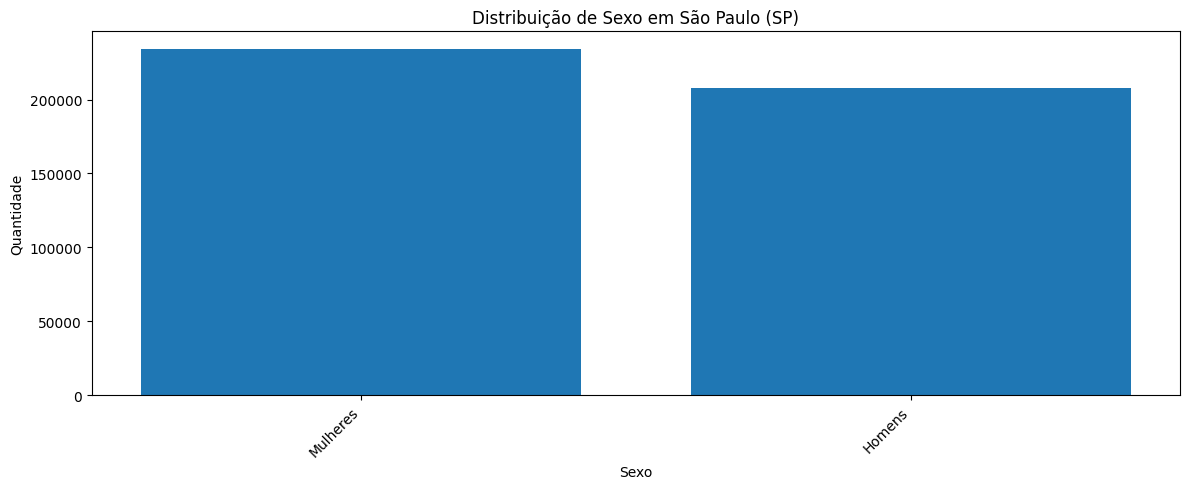

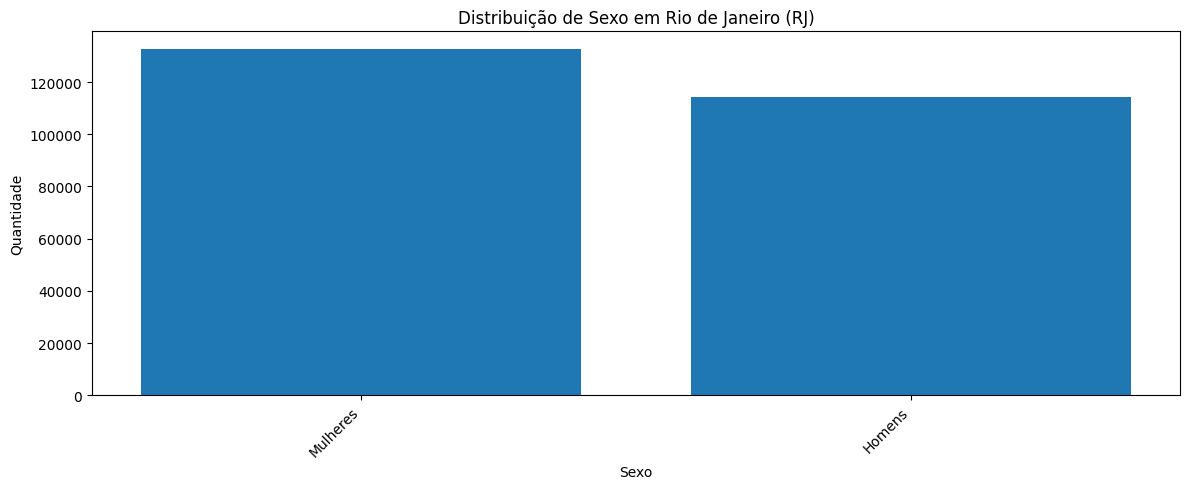

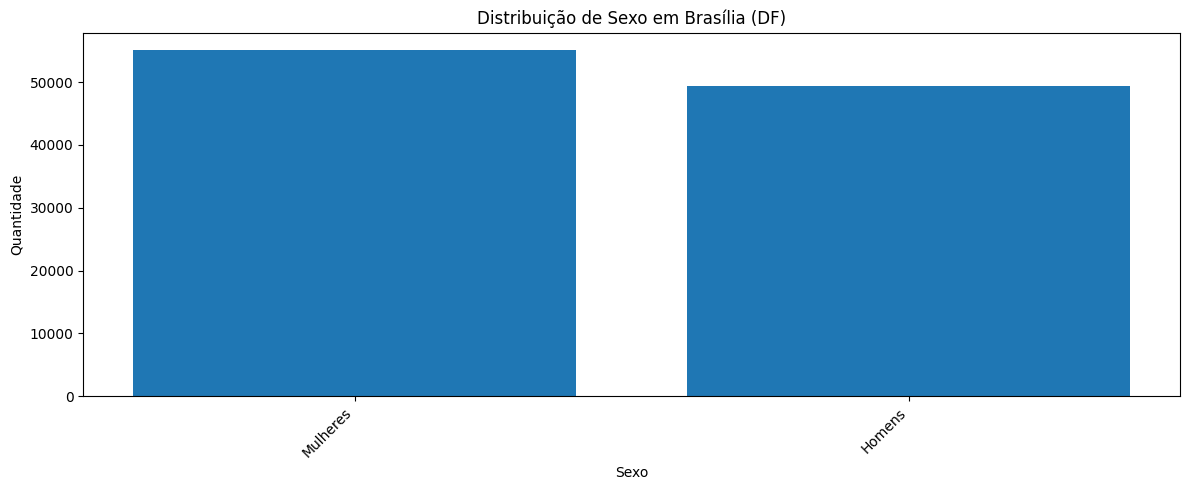

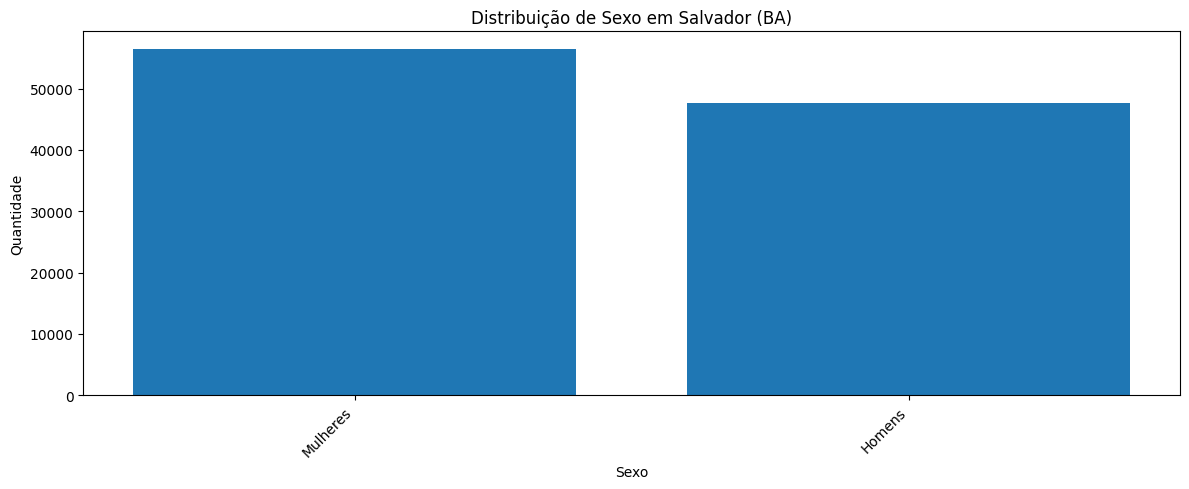

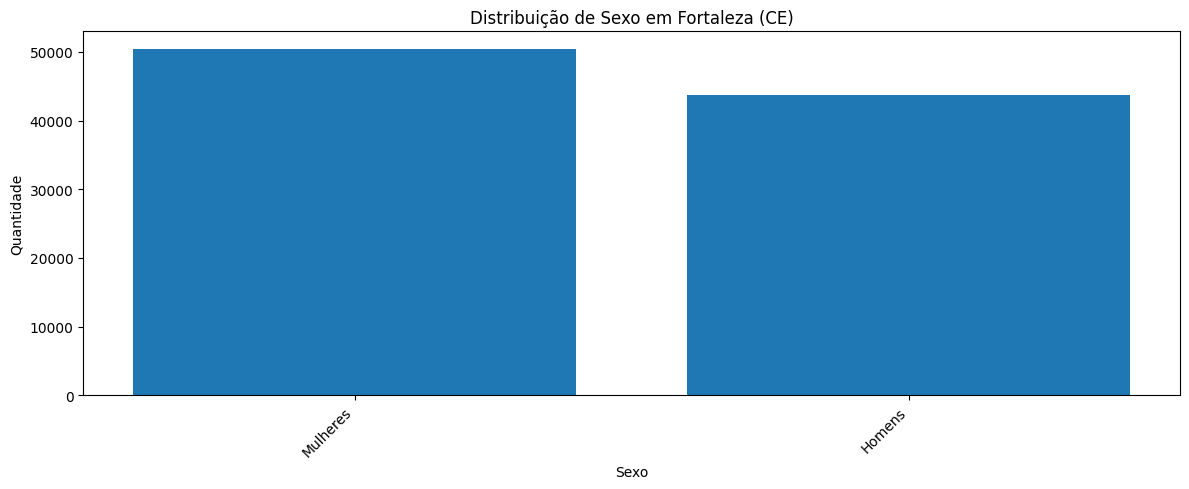

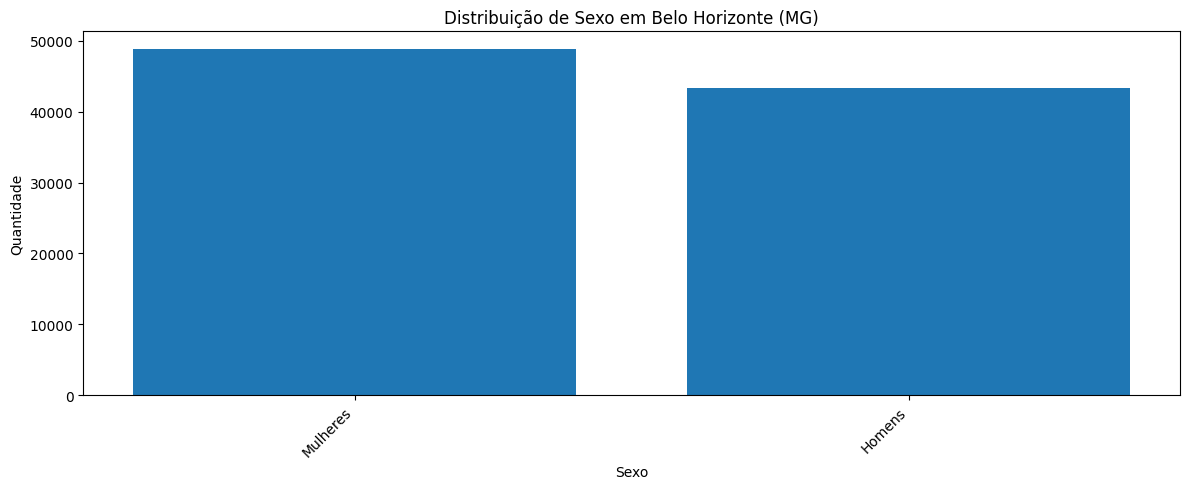

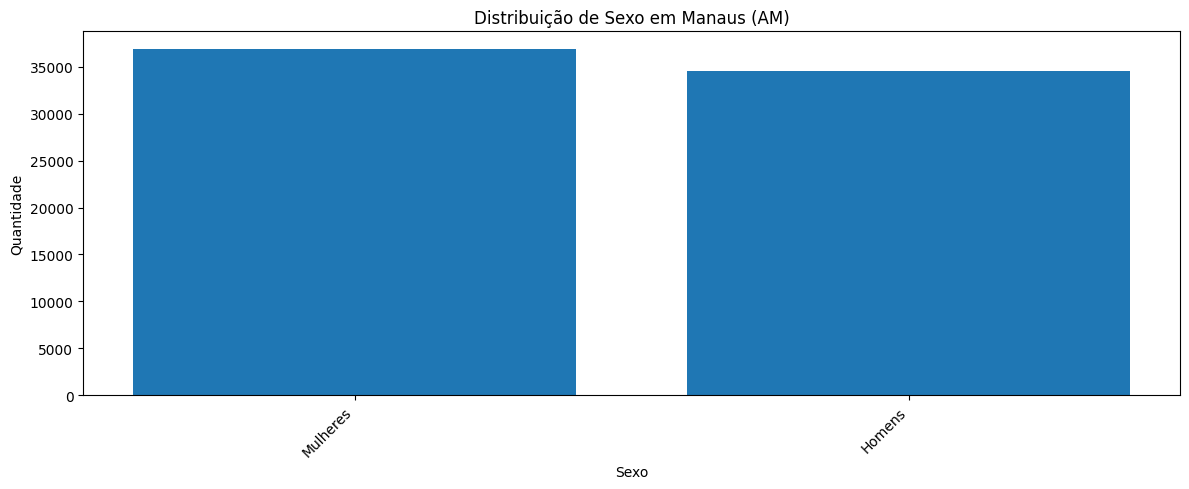

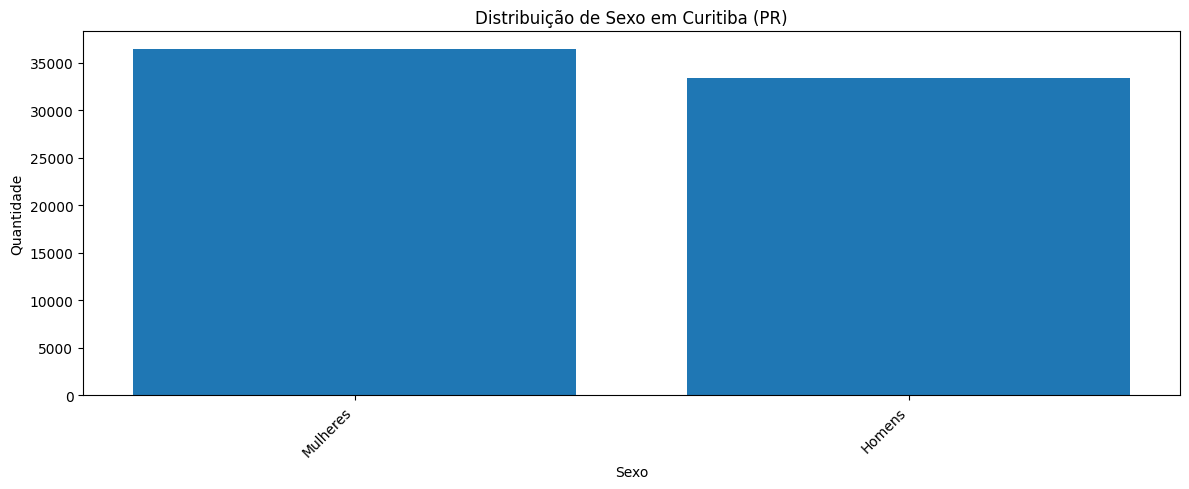

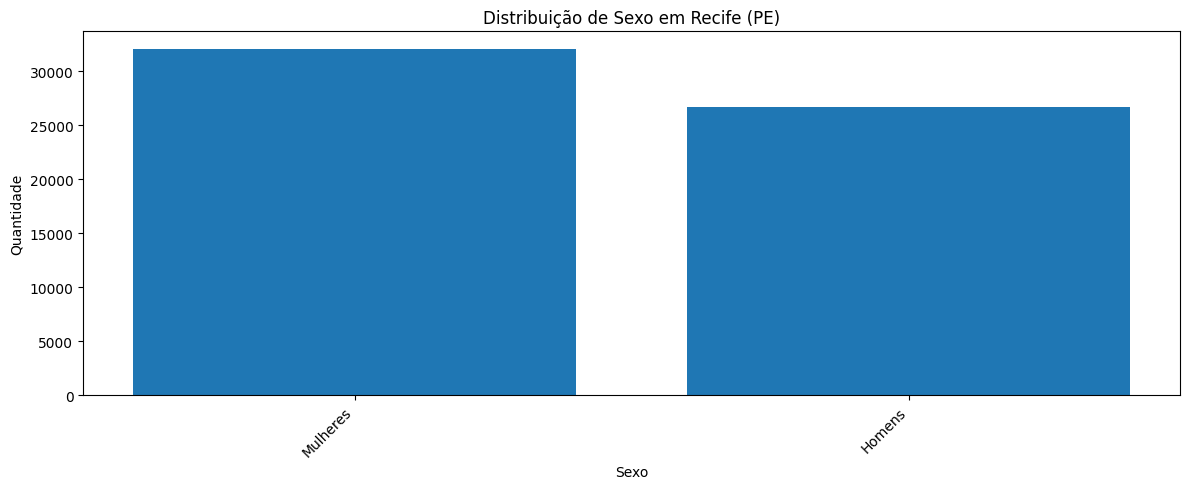

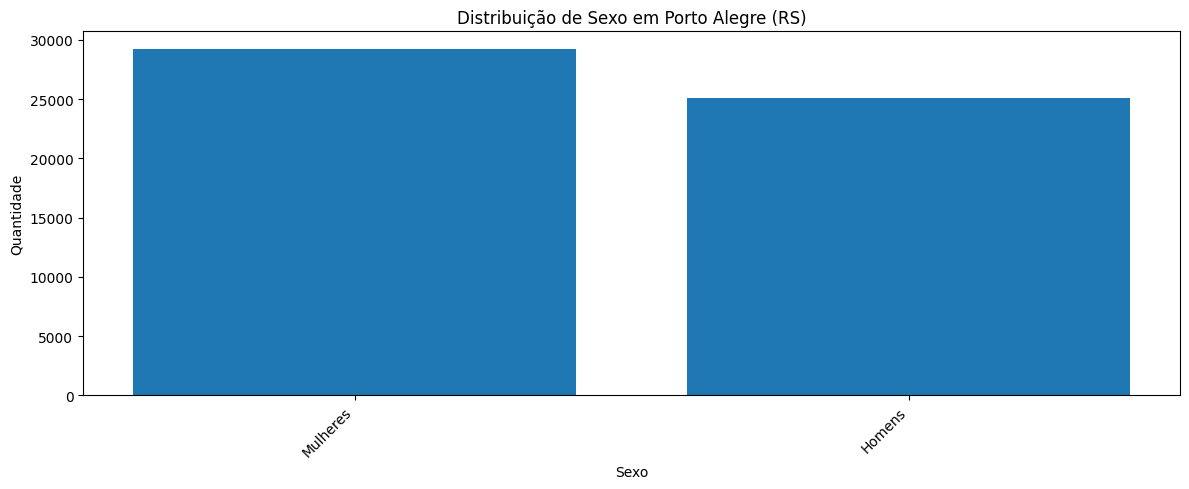

In [ ]:
dados_agrupados = tabela.groupby('municipio')['quantidade'].sum().reset_index()
maiores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=False).head(10)['municipio'].tolist()

for municipio in maiores_ofensores:

    dados_municipio = tabela[tabela['municipio'] == municipio]

    dados_agrupados_ocupacao = dados_municipio.groupby('Sexo')['quantidade'].sum().reset_index()

    dados_agrupados_ocupacao = dados_agrupados_ocupacao.sort_values(by=['quantidade'], ascending=False)

    plt.figure(figsize=(12, 5))
    plt.bar(dados_agrupados_ocupacao['Sexo'], dados_agrupados_ocupacao['quantidade'])
    plt.xlabel('Sexo')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição de Sexo em {municipio}')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()  
    plt.show()

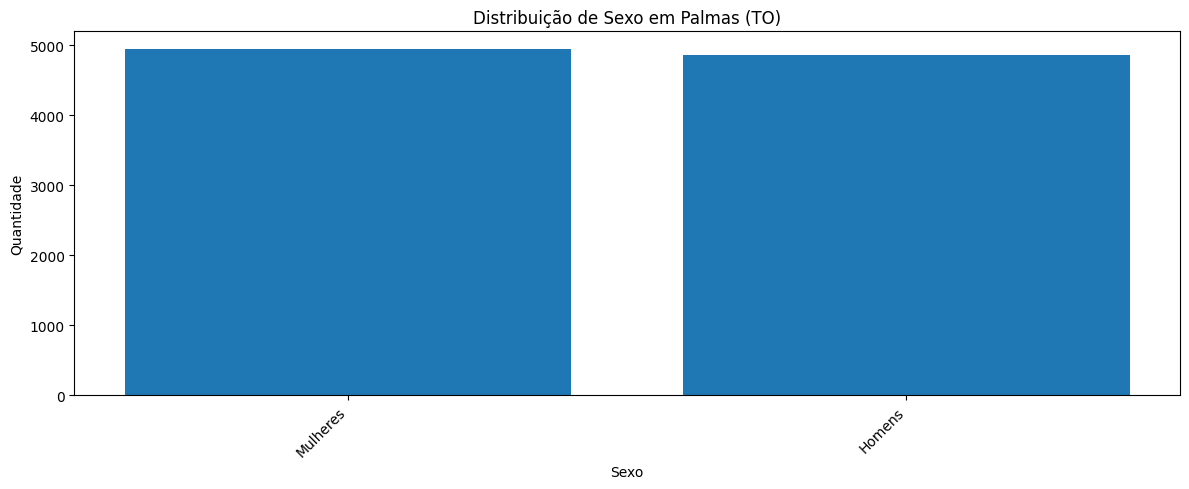

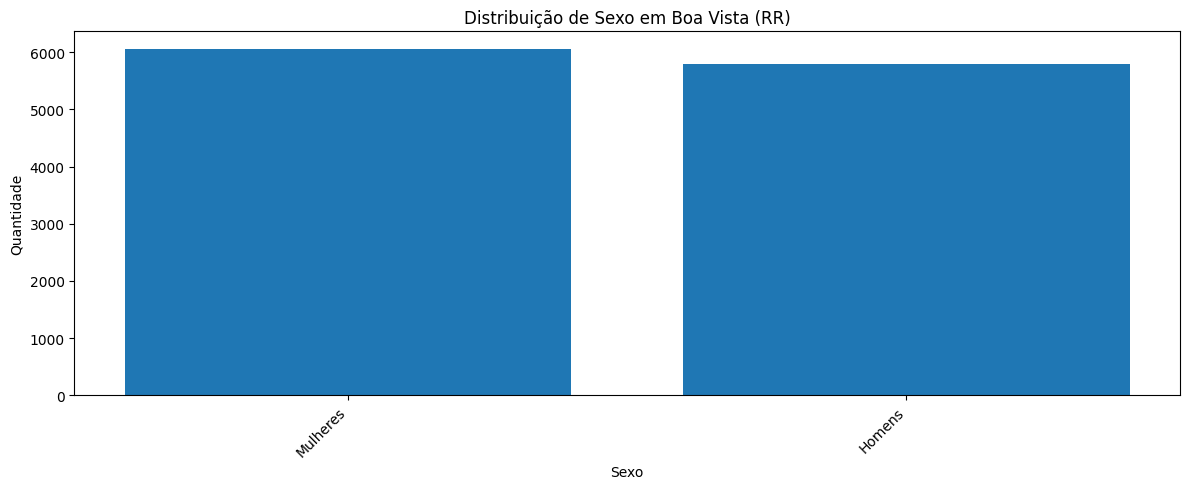

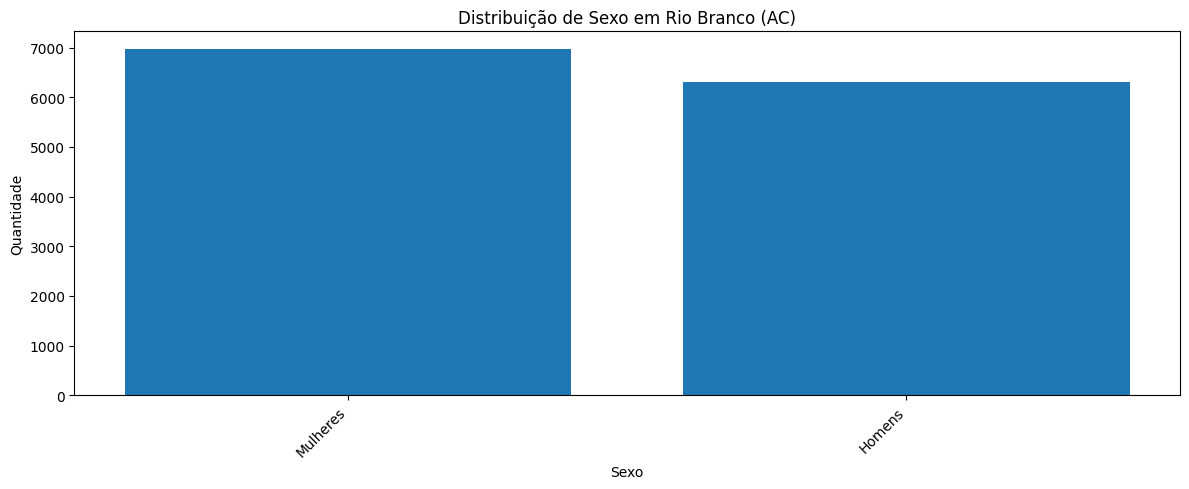

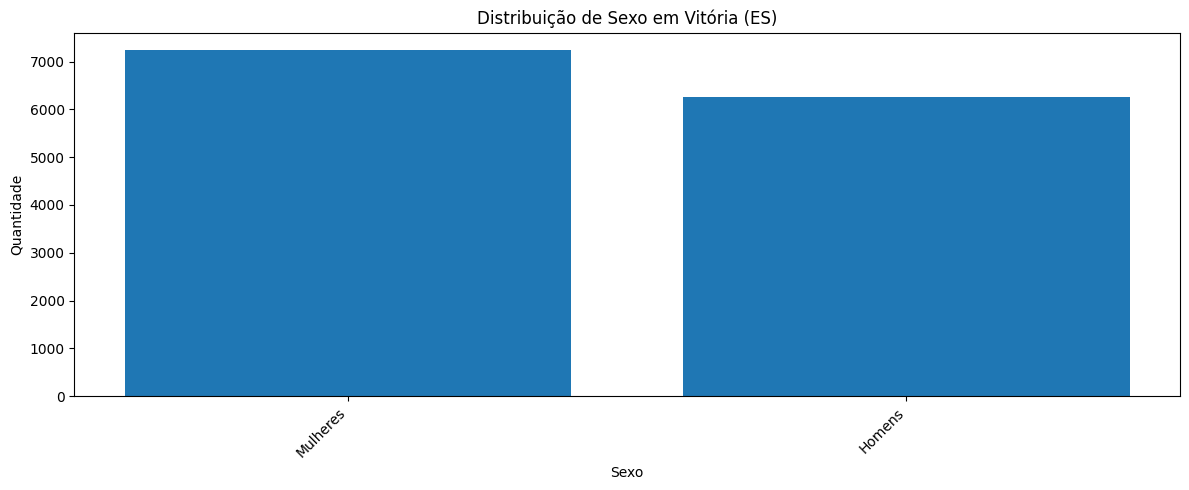

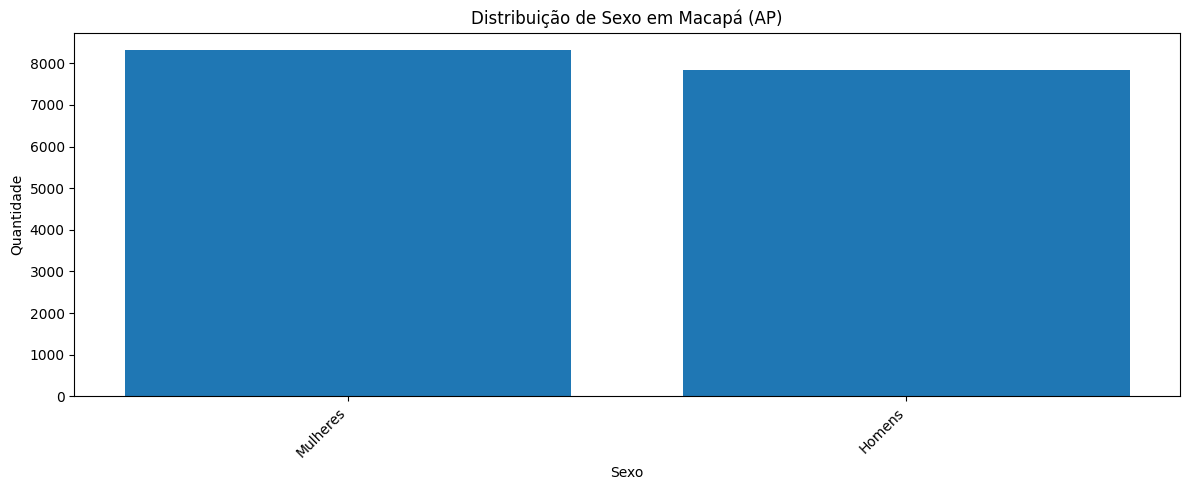

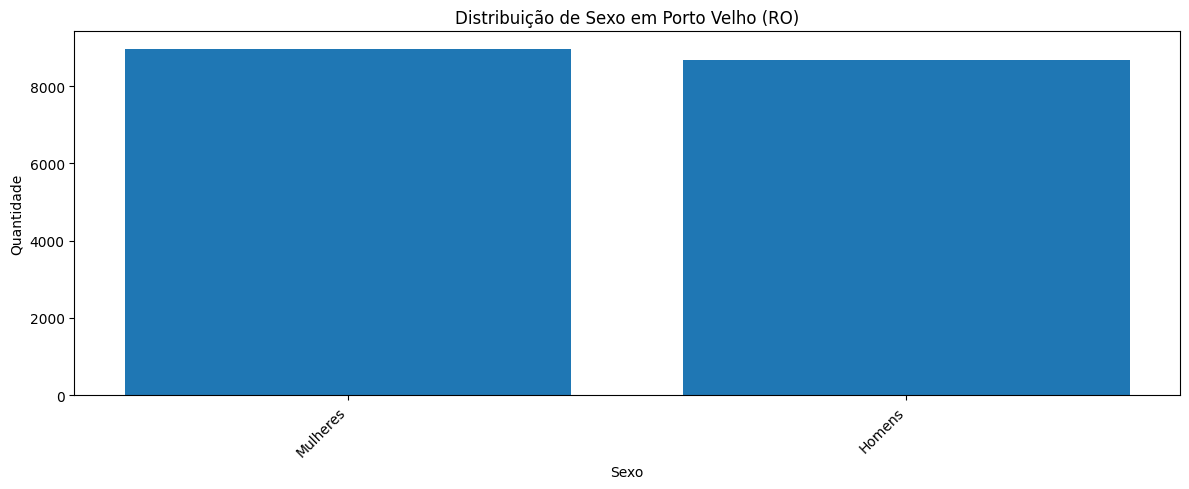

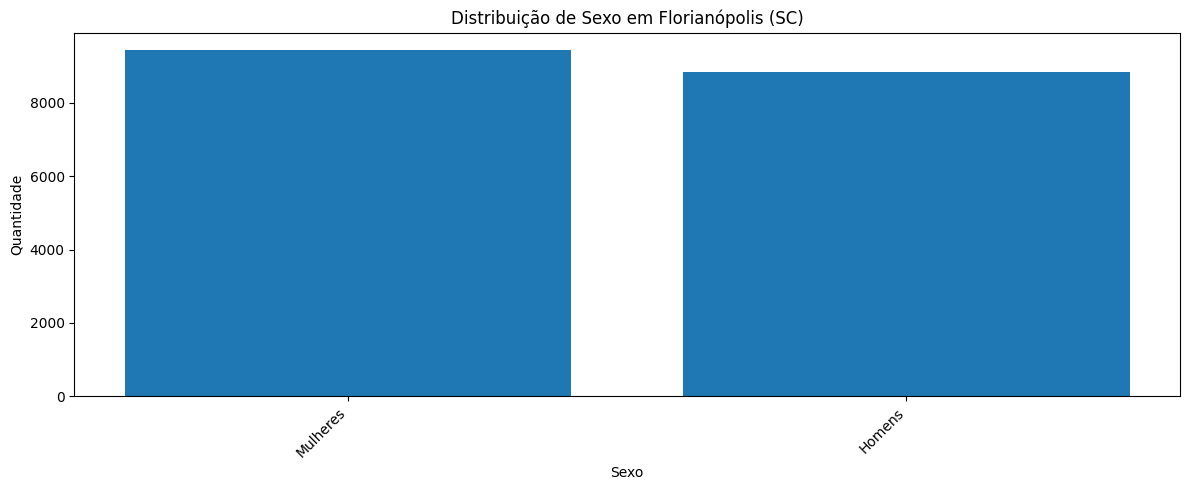

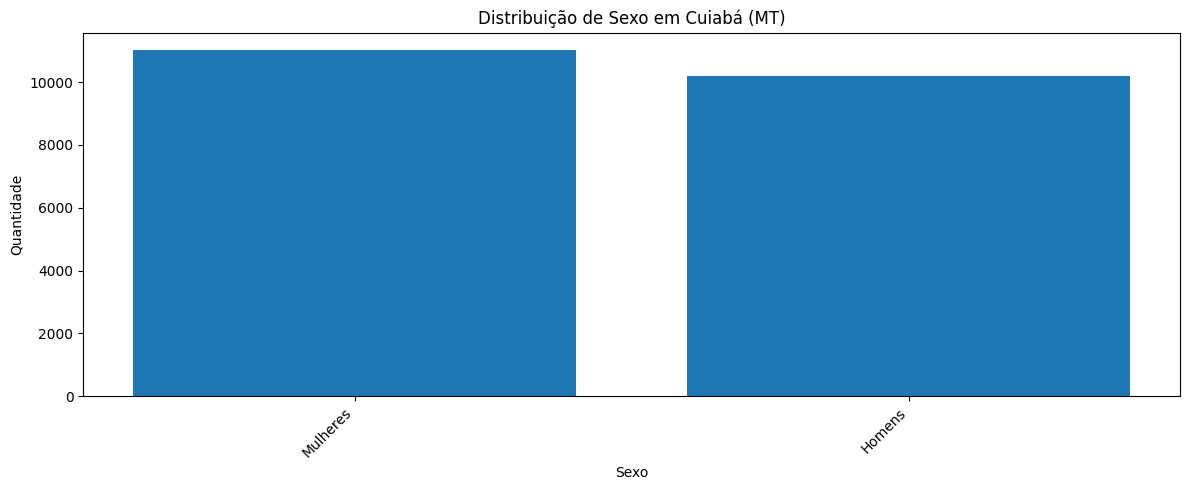

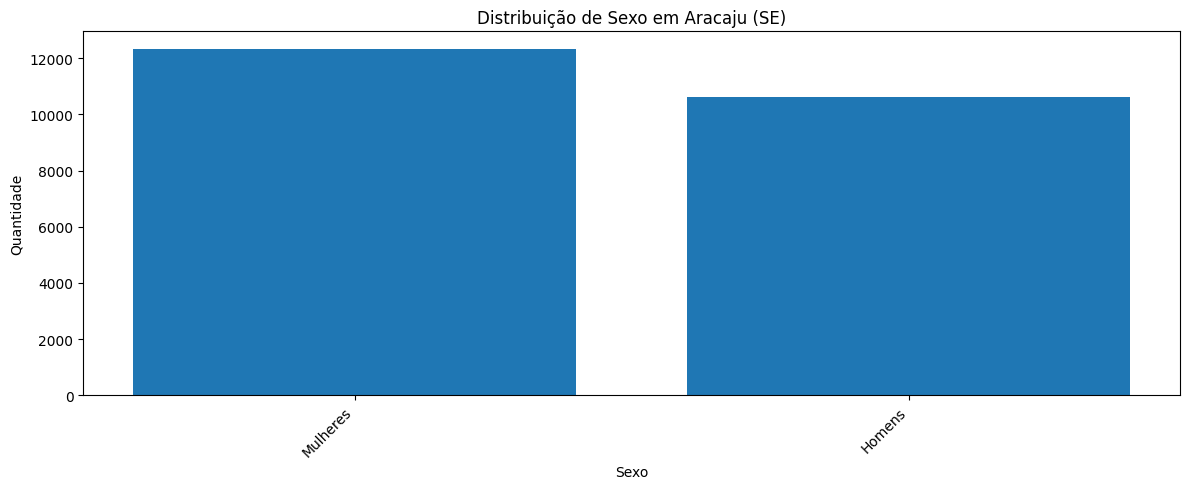

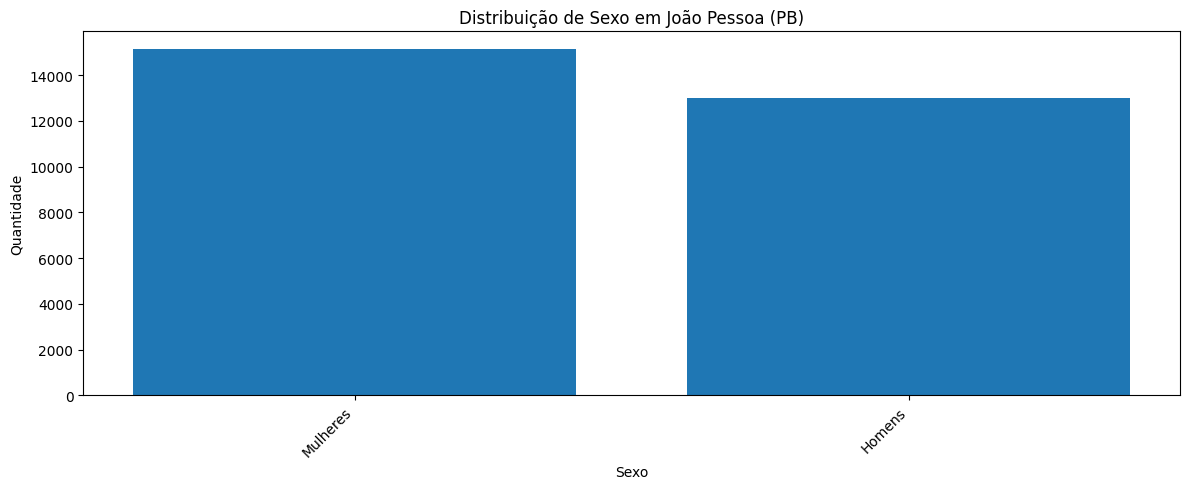

In [ ]:
dados_agrupados = tabela.groupby('municipio')['quantidade'].sum().reset_index()
menores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=True).head(10)['municipio'].tolist()

for municipio in menores_ofensores:
    dados_municipio = tabela[tabela['municipio'] == municipio]

    dados_agrupados_ocupacao = dados_municipio.groupby('Sexo')['quantidade'].sum().reset_index()

    dados_agrupados_ocupacao = dados_agrupados_ocupacao.sort_values(by=['quantidade'], ascending=False)

    plt.figure(figsize=(12, 5))
    plt.bar(dados_agrupados_ocupacao['Sexo'], dados_agrupados_ocupacao['quantidade'])
    plt.xlabel('Sexo')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição de Sexo em {municipio}')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()  
    plt.show()